INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Rastrigin', 'problem_size': 100, 'communication_type': 'mutation_many_many', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': {'type': 'global', 'start': 10, 'max': 30}, 'population size': 5, 'offspring size': 15, 'agent_modificaiton': None, 'base_probability': 0.0005, 'delete agents': True}
INFO:root:Socjo started
Progress: 100%|##########| 800000/800000 [40:37<00:00, 328.23it/s]
INFO:root:Socjo finished in 40.623114534219106
Progress: 100%|##########| 800000/800000 [33:42<00:00, 395.47it/s]
INFO:root:comparison finished in 33.71484733819962
INFO:root:best socjo 0.0004187527986942996 best single 0.0029186971342305412


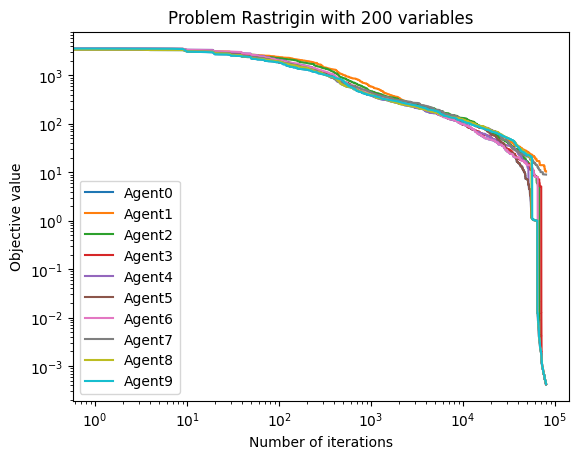

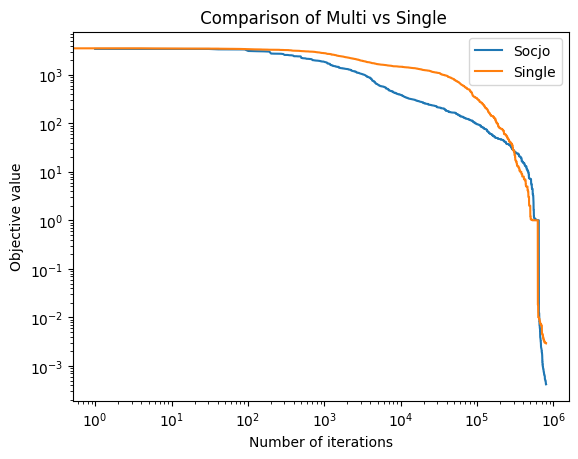

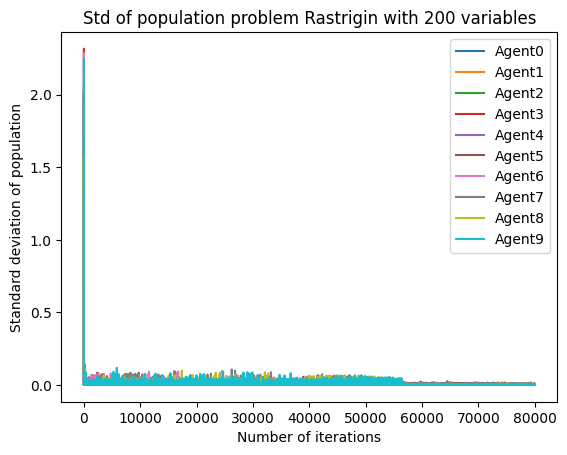

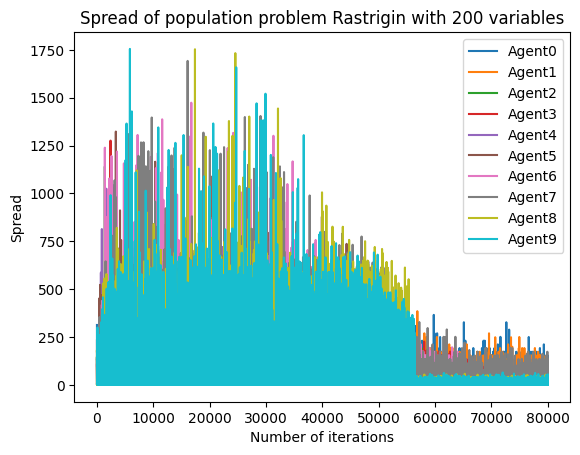

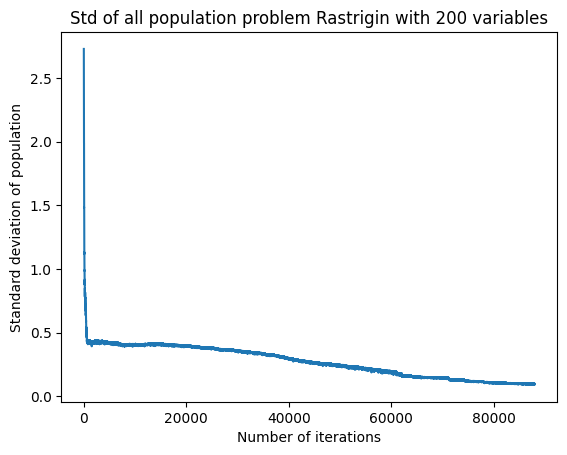

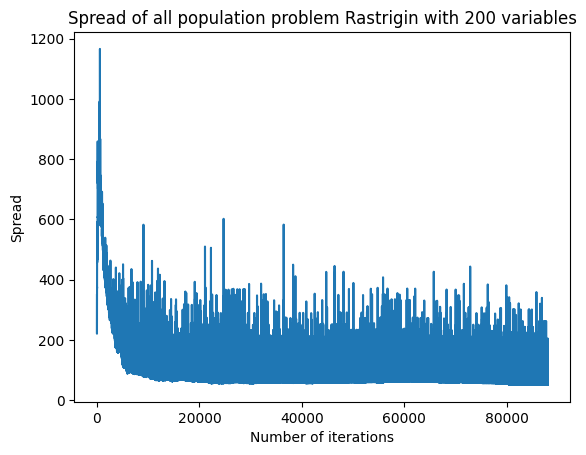

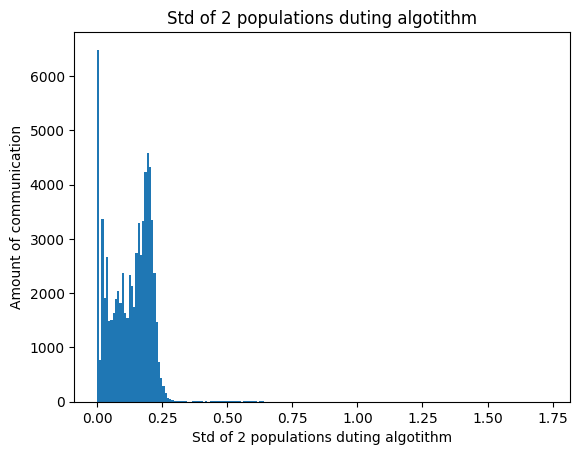

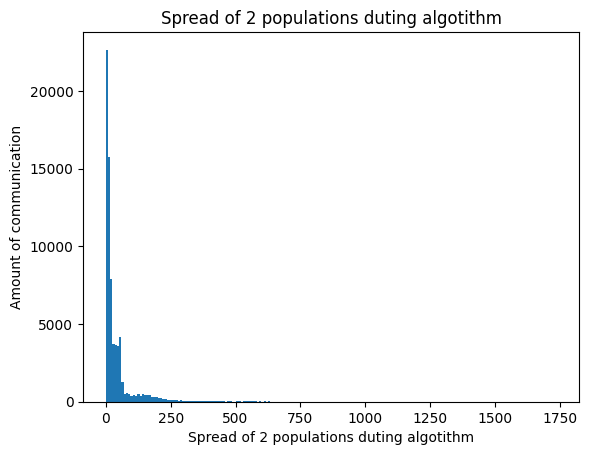

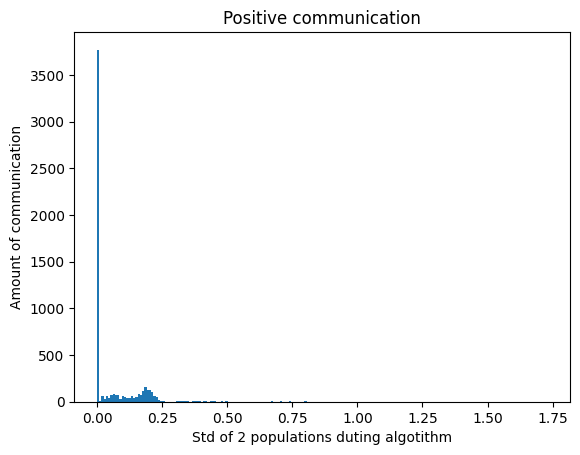

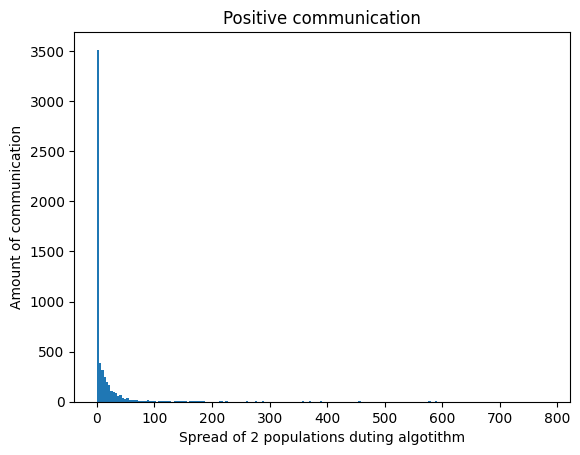

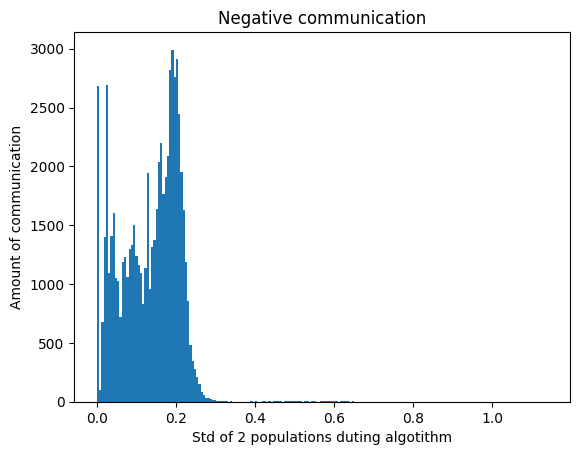

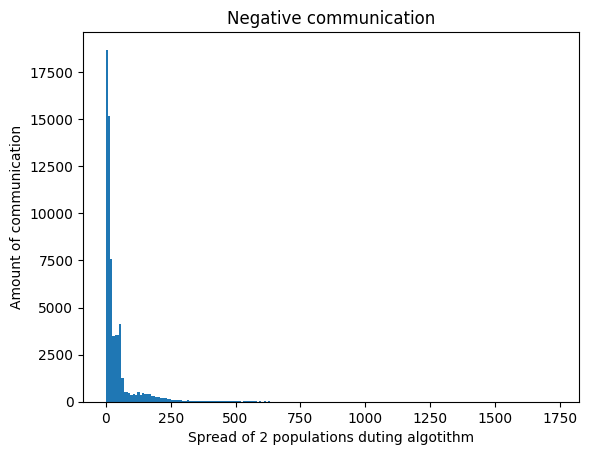

INFO:root:plotting finished in 0.1416393478711446
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 39.480376450220746


In [1]:
import logging
from settings.settings import Settings
from time import time
from runners.bulilders.statistic_builder import StatisticRunnerBuilder
import os
Statistic_runner_list = []
prefix = os.path.join("run_configs", "problem")
for agent_no in [10]:
    for idx, config in enumerate(["config_R.json"]):
        with open(os.path.join(prefix,config),"r") as f:
            settings = Settings(f)
            # logging.basicConfig(level=settings.log_level)
        logging.basicConfig(level=logging.INFO)
        config = settings.decodeAgentsData()
        config.noAgents = agent_no
        logging.info(settings.json_settings)
        from jmetal.problem.singleobjective.unconstrained import Rastrigin
        config.problem = Rastrigin(200)
        iterations = config.problem.number_of_variables**2 *20
        statisticRunnerBuilder = StatisticRunnerBuilder()
        statisticRunnerBuilder.set_agents_diffrent_porbability(config,3  )
        statisticRunnerBuilder.set_run_config(no_runs= 3, communication_num = 1, iterations = iterations, communication_freq=  10)
        Statistic_runner_list.append(statisticRunnerBuilder.build())
for statistic in Statistic_runner_list:
    statistic.run_an_collect_data()
    if settings.enable_plots:
        statistic.plot()